# Naive Bayes
1. Espacio de trabajo
2. Preprocesamiento
3. Modelo

In [1]:
# Espacio de trabajo
import pandas as pd
import re
import nltk
import numpy as np
from numpy.random import seed
from numpy.random import randint
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import matplotlib.pyplot as plt
%matplotlib inline
try:
    import seaborn
except:
    pass
import sys
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber', 'q'])
spanish_stopwords.remove('no')
spanish_stopwords.remove('ni')

In [2]:
#Cargar la base
base_entera = pd.read_excel(r'C:\Users\JOSE\Desktop\Trabajo\BX\Supervisado\Base_final_supervisada.xlsx')
base_entera

Unnamed: 0      ID                                            Snippet  \
0                0       0  Una vez llegué a mi casa y habían 5 venezolano...   
1                1       1  Soy venezolano y es triste admitir esa realida...   
2                2       2  Hice Dulce de lechosa venezolano oyendo y bail...   
3                3       3  @Roberto_MunozC Me refería al mercado interno ...   
4                4       4  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...   
...            ...     ...                                                ...   
562545      562545  562547  @kikscamp Creo que estamos viendo marchas dife...   
562546      562546  562548  @WRadioColombia Llora por los venezolanos, por...   
562547      562547  562549  Un pastor cristiano fue atacado por un migrant...   
562548      562548  562550  @NoticiasRCN Están cagaos porque su guarida ve...   
562549      562549  562551  Ante la masiva llegada de población migrante d...   

        Victima  Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  \
0             0           0          0         0         1            0   
1             1           0          0         0         1            0   
2             0           0          0         0         0            0   
3             0           0          0         0         0            0   
4             0           0          1         0         0            0   
...         ...         ...        ...       ...       ...          ...   
562545        0           0          0         0         0            0   
562546        0           0          0         0         0            0   
562547        0           0          0         0         0            0   
562548        0           0          0         0         0            0   
562549        0           0          0         0         0            0   

        Marcados  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
562545         0  
562546         0  
562547         0  
562548         0  
562549         0  

[562550 rows x 10 columns]

In [3]:
seed(1)
values = list(set(randint(0, 22255, 500)))

temp=base_entera.loc[base_entera['ID'].isin(values)]
print(len(temp))
del values

temp.head()

492


Unnamed: 0   ID                                            Snippet  \
15           15   15  @SdrodriguezT xenofobia?? Hermanos venezolanos...   
20           20   20  Iban a explotar sexualmente a una niña. Agente...   
42           42   42  ¡2,35% menos! Cifra de ciudadanos venezolanos ...   
144         144  144  @jubuarango @IvanCepedaCast @petrogustavo Quie...   
174         174  174  compromiso compartido con el restablecimiento ...   

     Victima  Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  Marcados  
15         0           0          1         0         0            0         1  
20         0           0          0         0         0            0         1  
42         0           0          0         0         0            0         1  
144        0           0          0         0         0            0         1  
174        0           0          0         0         0            0         1

In [4]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
base_entera['Clean_Text']=base_entera['Snippet'].replace(r"http\S+", '', regex=True)
base_entera = base_entera.astype({"Clean_Text": str})
#Eliminamos todos los hashtags
base_entera['Clean_Text']=base_entera['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
base_entera['Clean_Text']=base_entera['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
base_entera['Clean_Text']=base_entera['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
base_entera['Clean_Text']=base_entera['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
base_entera['Clean_Text']=base_entera['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
base_entera['Clean_Text']=base_entera['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
base_entera['Clean_Text'] = base_entera['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Remover mayúsculas de inicio de texto
base_entera['Clean_Text'] = base_entera['Clean_Text'].map(lambda x: x.lower())
#Eliminamos algunos autores
base_entera['Clean_Text']=base_entera['Clean_Text'].replace(r'@\w+', '', regex=True)
base_entera['Clean_Text']=base_entera['Clean_Text'].str.strip()
base_entera=base_entera.reset_index(drop=True)
base_entera.head(11)

Unnamed: 0  ID                                            Snippet  \
0            0   0  Una vez llegué a mi casa y habían 5 venezolano...   
1            1   1  Soy venezolano y es triste admitir esa realida...   
2            2   2  Hice Dulce de lechosa venezolano oyendo y bail...   
3            3   3  @Roberto_MunozC Me refería al mercado interno ...   
4            4   4  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...   
5            5   5  @penfold_michael De hoy a finales del 2022 ser...   
6            6   6  #1Feb 🇻🇪 Decenas de migrantes venezolanos se e...   
7            7   7  @BrianSnow007 @anGspot @iKarlyzr Eso es falso,...   
8            8   8  ..mexicano Wade Torres en la guitarra y el col...   
9            9   9           @fabrorejon Vergacion, ya se puso veneco   
10          10  10  @Salas91Adrian @Camilousuga11 @SaqueLargoWin A...   

    Victima  Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  Marcados  \
0         0           0          0         0         1            0         1   
1         1           0          0         0         1            0         1   
2         0           0          0         0         0            0         1   
3         0           0          0         0         0            0         1   
4         0           0          1         0         0            0         1   
5         1           0          0         0         0            0         1   
6         0           0          0         0         0            0         1   
7         1           0          1         1         0            0         1   
8         0           0          0         0         0            0         1   
9         1           0          1         0         0            0         1   
10        1           0          1         0         0            0         1   

                                           Clean_Text  
0   una vez llegué a mi casa y habían 5 venezolano...  
1   soy venezolano y es triste admitir esa realida...  
2   hice dulce de lechosa venezolano oyendo y bail...  
3     me refería al mercado interno venezolano jajaja  
4                   estos venecos hasta en la sopa 👎🤢  
5   de hoy a finales del 2022 serán muchos los ven...  
6   decenas de migrantes venezolanos se encuentran...  
7   eso es falso en venezuela así como en todos lo...  
8   mexicano wade torres en la guitarra y el colom...  
9                         vergacion ya se puso veneco  
10                                 aprende venezolano

In [5]:
#Tomemos solo la base marcada
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;-]')
base_marcada = base_entera[base_entera['Marcados'] == 1]
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = deEmojify(text)
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = ' '.join(word for word in text.split() if word not in spanish_stopwords) # delete stopwors from text
    return text
base_marcada['words'] = base_marcada['Clean_Text'].apply(clean_text)
base_marcada.head(11)

<ipython-input-5-ead7ff1126a1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_marcada['words'] = base_marcada['Clean_Text'].apply(clean_text)


Unnamed: 0  ID                                            Snippet  \
0            0   0  Una vez llegué a mi casa y habían 5 venezolano...   
1            1   1  Soy venezolano y es triste admitir esa realida...   
2            2   2  Hice Dulce de lechosa venezolano oyendo y bail...   
3            3   3  @Roberto_MunozC Me refería al mercado interno ...   
4            4   4  @kenin_nunez @SOMOSRIOCRECID Estos venecos, ha...   
5            5   5  @penfold_michael De hoy a finales del 2022 ser...   
6            6   6  #1Feb 🇻🇪 Decenas de migrantes venezolanos se e...   
7            7   7  @BrianSnow007 @anGspot @iKarlyzr Eso es falso,...   
8            8   8  ..mexicano Wade Torres en la guitarra y el col...   
9            9   9           @fabrorejon Vergacion, ya se puso veneco   
10          10  10  @Salas91Adrian @Camilousuga11 @SaqueLargoWin A...   

    Victima  Victimario  Xenofobia  Denuncia  Positiva  Tag 666 777  Marcados  \
0         0           0          0         0         1            0         1   
1         1           0          0         0         1            0         1   
2         0           0          0         0         0            0         1   
3         0           0          0         0         0            0         1   
4         0           0          1         0         0            0         1   
5         1           0          0         0         0            0         1   
6         0           0          0         0         0            0         1   
7         1           0          1         1         0            0         1   
8         0           0          0         0         0            0         1   
9         1           0          1         0         0            0         1   
10        1           0          1         0         0            0         1   

                                           Clean_Text  \
0   una vez llegué a mi casa y habían 5 venezolano...   
1   soy venezolano y es triste admitir esa realida...   
2   hice dulce de lechosa venezolano oyendo y bail...   
3     me refería al mercado interno venezolano jajaja   
4                   estos venecos hasta en la sopa 👎🤢   
5   de hoy a finales del 2022 serán muchos los ven...   
6   decenas de migrantes venezolanos se encuentran...   
7   eso es falso en venezuela así como en todos lo...   
8   mexicano wade torres en la guitarra y el colom...   
9                         vergacion ya se puso veneco   
10                                 aprende venezolano   

                                                words  
0   vez llegué casa 5 venezolanos mamá complicidad...  
1   venezolano triste admitir realidad venezuela a...  
2   hice dulce lechosa venezolano oyendo bailando ...  
3           refería mercado interno venezolano jajaja  
4                                      venecos sopa 🤢  
5   hoy finales 2022 venezolanos emigrado fallecid...  
6   decenas migrantes venezolanos encuentran atrap...  
7   falso venezuela así países xenofobia nacido n ...  
8   mexicano wade torres guitarra colombo venezola...  
9                               vergacion puso veneco  
10                                 aprende venezolano

In [6]:
base_marcada['words'].apply(lambda x: len(x.split(' '))).sum()

3630089

In [7]:
from collections import Counter
df = pd.DataFrame()
df['word_count'] = base_marcada['words'].apply(lambda x: Counter(x.lower().split()))
df['word_count']

0         {'vez': 1, 'llegué': 1, 'casa': 2, '5': 1, 've...
1         {'venezolano': 1, 'triste': 1, 'admitir': 1, '...
2         {'hice': 1, 'dulce': 1, 'lechosa': 1, 'venezol...
3         {'refería': 1, 'mercado': 1, 'interno': 1, 've...
4                         {'venecos': 1, 'sopa': 1, '🤢': 1}
                                ...                        
549991    {'mejor': 1, 'asentamiento': 1, 'vivir': 1, 'c...
549992    {'dicen': 1, 'ayuda': 1, '2000': 2, 'personasc...
549993    {'venezolanos': 1, 'colombia': 1, 'quieran': 1...
549994    {'sii': 1, 'gracias': 1, 'dios': 1, 'fin': 1, ...
549995    {'calidad': 1, 'vida': 1, 'imbecil': 1, 'anda'...
Name: word_count, Length: 242870, dtype: object

In [15]:
'''
base_marcada = base_marcada.dropna()
from spacy_spanish_lemmatizer import SpacyCustomLemmatizer
# Le decimos a spaCy que vamos con toda
spacy.prefer_gpu()
#spacy.require_gpu()
# Corremos los datos en el core de español
#nlp = spacy.load("es_core_news_sm", exclude=["ner", "parser"])
nlp = spacy.load("es_dep_news_trf", exclude=["ner", "parser", "lemmatizer"])
lemmatizer_spa = SpacyCustomLemmatizer()
nlp.add_pipe("spanish_lemmatizer", name = 'lemmatizer', after = 'attribute_ruler')
#nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
#Vemos cuales son los componentes del pipeline
print(nlp.pipe_names)
#Aplicamos el pipe a cada objeto de nuestra lista de tweets
print('---------SPACY-----------')
%time docs = list(nlp.pipe(base_marcada.words.to_list()))
'''

['transformer', 'morphologizer', 'attribute_ruler', 'lemmatizer']
---------SPACY-----------


SystemError: <class 'list'> returned NULL without setting an error

In [16]:
'''
print('---------LEMMATIZER-----------')
lemma=[]
for doc in docs:
    lemma.append([(token.lemma_) for token in doc])
data_lemmatized = lemma
lemma=np.array(lemma)
lemma=pd.DataFrame(lemma).reset_index()
lemma.columns=['index', 'lemmatized']
base_marcada=pd.merge(base_marcada, lemma, how='inner', on='index')
base_marcada=base_marcada.drop(['index'], axis=1)
data_lemmatized=list(base_marcada['lemmatized'])
texts = data_lemmatized
base_marcada.head(11)
'''

---------LEMMATIZER-----------


NameError: name 'docs' is not defined

In [17]:
from sklearn.model_selection import train_test_split
X = base_marcada.words
# creating bag of words model
cv = CountVectorizer(max_features = 2000)
%time X = cv.fit_transform(X).toarray()
# EN ESTE EJERCICIO VAMOS A CLASIFICAR SOLO XENOFOBIA
y = base_marcada.Xenofobia
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Wall time: 3.89 s


In [18]:
# fitting naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
  
classifier = GaussianNB();
classifier.fit(X_train, y_train)
  
# predicting test set results
y_pred = classifier.predict(X_test)

In [19]:
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[31090, 32810],
       [ 1074,  7887]], dtype=int64)

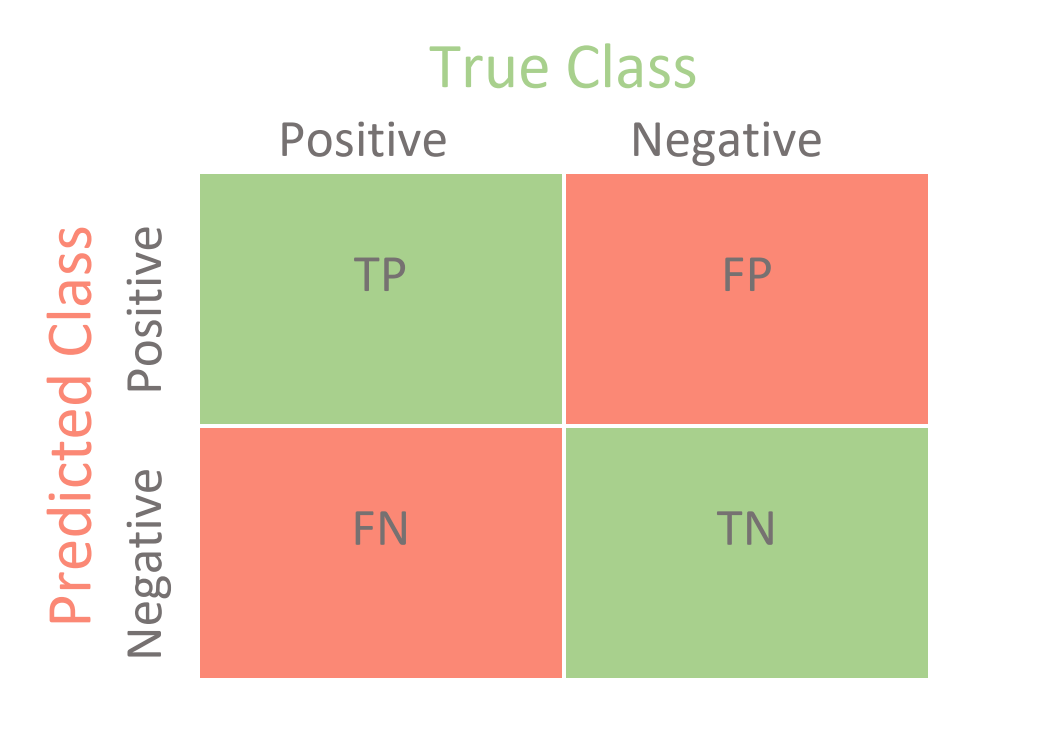

In [20]:
from IPython.core.display import Image, display
display(Image(filename='matriz_confusion.png'))

In [21]:
%%time
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5349501104843469
              precision    recall  f1-score   support

           0       0.97      0.49      0.65     63900
           1       0.19      0.88      0.32      8961

    accuracy                           0.53     72861
   macro avg       0.58      0.68      0.48     72861
weighted avg       0.87      0.53      0.61     72861

Wall time: 2.45 s
